# PROJECT: EXTRACTION OF SPOTIFY DATA FOR DATA ANALYIS

In [ ]:
import spotipy
import pandas as pd
import time
from spotipy.oauth2 import SpotifyClientCredentials
import json

In [21]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']
playlist_index=0
playlists=json.load(open('playlists_like_dislike.json'))
playlist_uri=playlists[playlist_index]['uri']
like=playlists[playlist_index]['like']
client_credentials_manager=SpotifyClientCredentials( client_id=client_id,client_secret= client_secret)
sp= spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [22]:
uri= playlist_uri
username=uri.split(':')[2]
playlist_id=uri.split(':')[4]

In [23]:
results=sp.user_playlist(username,playlist_id,'tracks')

In [24]:
playlist_tracks_data=results['tracks']
playlist_tracks_id=[]
playlist_tracks_titles=[]
playlist_tracks_artists=[]
playlist_tracks_first_artists=[]
for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    
    artist_list=[]
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

# Extracting Audio Features Of Each Track

In [25]:
features=sp.audio_features(playlist_tracks_id)

In [26]:
features_df=pd.DataFrame(data=features, columns=features[0].keys())

In [28]:
features_df['id']=playlist_tracks_id
features_df['title']=playlist_tracks_titles
features_df['first_artist']= playlist_tracks_first_artists
features_df['all_artists']= playlist_tracks_artists
#features_df=features_df.set_index('id')
features_df=features_df[['id', 'title', 'first_artist', 'all_artists',
                         'danceability','energy','key','loudness',
                         'mode','acousticness','instrumentalness',
                         'liveness','valence','tempo',
                         'duration_ms','time_signature']]

In [29]:
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,"[Ed Sheeran, Camila Cabello, Cardi B]",0.857,0.621,9,-6.376,0,0.1480,0.000000,0.0865,0.668,97.989,204467,4
1,1jIMjbzcGCcCQn5iMu9CUc,That's Hilarious,Charlie Puth,[Charlie Puth],0.714,0.442,6,-5.909,1,0.7420,0.000000,0.1140,0.546,108.039,146855,4
2,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,Ed Sheeran,[Ed Sheeran],0.807,0.893,11,-3.745,0,0.0451,0.000028,0.3660,0.537,126.011,230747,4
3,6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),Taylor Swift,[Taylor Swift],0.584,0.557,6,-6.371,1,0.0129,0.000000,0.0576,0.767,154.008,219760,4
4,50nfwKoDiSYg8zOCREWAm5,Shivers,Ed Sheeran,[Ed Sheeran],0.788,0.859,2,-2.724,1,0.2810,0.000000,0.0424,0.822,141.020,207853,4


In [25]:
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,
2n6red10oCd6YhlEUp6jXy,2n6red10oCd6YhlEUp6jXy,Used To Be,Jonas Brothers,[Jonas Brothers],0.710,0.517,1,-6.850,1,0.1720,0.0,0.0786,0.176,145.946,184987,4
51ChrwmUPDJvedPQnIU8Ls,51ChrwmUPDJvedPQnIU8Ls,Dive,Ed Sheeran,[Ed Sheeran],0.761,0.386,4,-6.158,1,0.3550,0.0,0.0953,0.526,134.943,238440,3
6XlSyYFTU1nodeWwwzVgTV,6XlSyYFTU1nodeWwwzVgTV,Sangria Wine,Pharrell Williams,"[Pharrell Williams, Camila Cabello]",0.831,0.713,1,-3.646,0,0.1810,0.0,0.0572,0.690,132.109,202853,4
6SznMYPQJHzr3IwsAHLId2,6SznMYPQJHzr3IwsAHLId2,Bibia Be Ye Ye,Ed Sheeran,[Ed Sheeran],0.738,0.677,7,-5.121,1,0.5200,0.0,0.1330,0.882,127.067,176747,4
0jS8J4DPuFXEJo26DwIVGJ,0jS8J4DPuFXEJo26DwIVGJ,Chemicals,The Vamps,[The Vamps],0.695,0.668,7,-4.406,1,0.0423,0.0,0.1200,0.696,159.930,170693,4


In [30]:
# Numbers of rolls and columns
features_df.shape

(50, 16)

In [ ]:
# There are 50 rolls and 16 columns

In [ ]:
# finding missing values

In [54]:
features_df.isnull().sum()

id                  0
title               0
first_artist        0
all_artists         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration            0
dtype: int64

In [ ]:
# There're no missing values

In [ ]:
# converting the data to csv file

In [ ]:
features_df.to_csv('MY PLAYLIST'+str(playlist_index)+".csv",encoding='utf-8',index='false')

## DATA EXPLORATION ANALYSIS

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
features_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,50.0,0.655480,0.140470,0.33100,0.577250,0.6415,0.760750,0.95600
energy,50.0,0.569180,0.174263,0.24200,0.421750,0.5780,0.696750,0.89300
key,50.0,5.660000,3.679008,0.00000,2.000000,6.0000,9.000000,11.00000
loudness,50.0,-6.456960,2.040277,-12.68300,-7.476750,-6.1570,-5.372250,-2.72400
mode,50.0,0.780000,0.418452,0.00000,1.000000,1.0000,1.000000,1.00000
acousticness,50.0,0.319286,0.280465,0.00253,0.077675,0.1980,0.543500,0.92400
instrumentalness,50.0,0.000108,0.000540,0.00000,0.000000,0.0000,0.000011,0.00377
liveness,50.0,0.146816,0.101542,0.02640,0.088250,0.1040,0.145250,0.42000
valence,50.0,0.506958,0.241201,0.09690,0.291500,0.4745,0.702500,0.95600
tempo,50.0,114.825940,29.756217,62.63100,90.560000,105.9970,138.797500,184.00900


In [ ]:
 # converting duration from miliseconds to seconds

In [32]:
features_df['duration']=features_df['duration_ms'].apply(lambda x: round(x/1000))
features_df.drop('duration_ms', inplace=True, axis=1)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,"[Ed Sheeran, Camila Cabello, Cardi B]",0.857,0.621,9,-6.376,0,0.1480,0.000000,0.0865,0.668,97.989,4,204
1,1jIMjbzcGCcCQn5iMu9CUc,That's Hilarious,Charlie Puth,[Charlie Puth],0.714,0.442,6,-5.909,1,0.7420,0.000000,0.1140,0.546,108.039,4,147
2,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,Ed Sheeran,[Ed Sheeran],0.807,0.893,11,-3.745,0,0.0451,0.000028,0.3660,0.537,126.011,4,231
3,6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),Taylor Swift,[Taylor Swift],0.584,0.557,6,-6.371,1,0.0129,0.000000,0.0576,0.767,154.008,4,220
4,50nfwKoDiSYg8zOCREWAm5,Shivers,Ed Sheeran,[Ed Sheeran],0.788,0.859,2,-2.724,1,0.2810,0.000000,0.0424,0.822,141.020,4,208


In [55]:
features_df.to_csv('MY PLAYLIST2'+str(playlist_index)+".csv",encoding='utf-8',index='false')

In [ ]:
# I dropped 'key', 'mode' to conduct a correlation analysis

[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'loudness'),
 Text(3.5, 0, 'acousticness'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'valence'),
 Text(7.5, 0, 'tempo'),
 Text(8.5, 0, 'time_signature'),
 Text(9.5, 0, 'duration')]

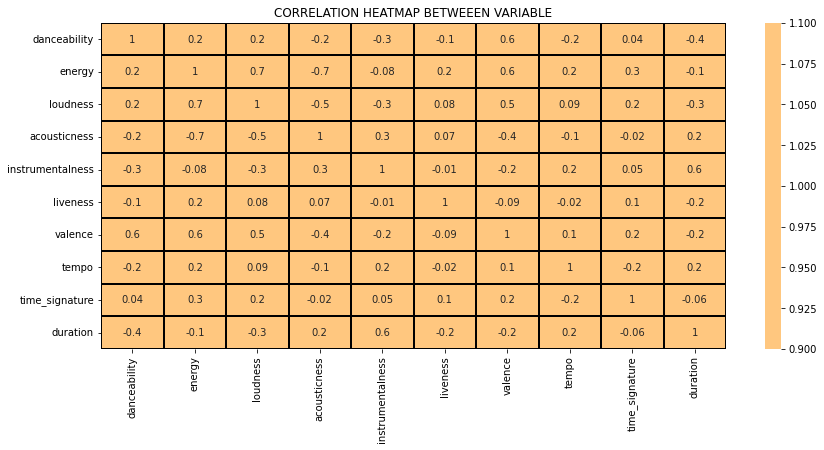

In [37]:
cor_df=features_df.drop(['key','mode'],axis=1).corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(cor_df,annot=True,fmt='.1g',vmax=1,vmin=1,center=0,cmap='copper',linewidths=1,linecolor='Black')
heatmap.set_title('CORRELATION HEATMAP BETWEEEN VARIABLE')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)


In [ ]:
#I created a regression plot 

In [48]:
reg_df=features_df.sample(int(0.5*len(features_df)))


In [49]:
print(len(reg_df))

25


[Text(0.5, 1.0, 'Loudness vs Eenery Correlation')]

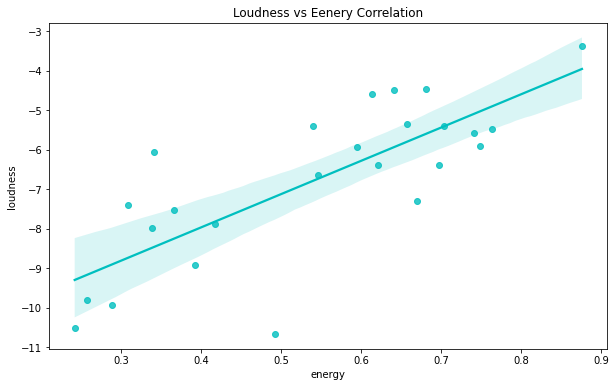

In [50]:
plt.figure(figsize=(10,6))
sns.regplot(data=reg_df, y='loudness',x='energy', color='c').set(title='Loudness vs Energy Correlation')

In [ ]:
#There's a very high correlation betweeen Loudness vs Energy

[Text(0.5, 1.0, 'Danceability vs Acousticness Correlation')]

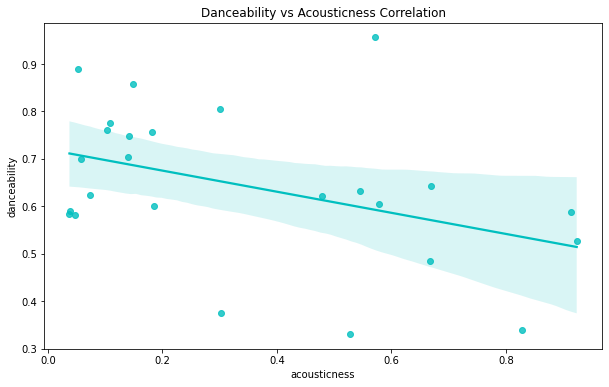

In [53]:
plt.figure(figsize=(10,6))
sns.regplot(data=reg_df, y='danceability',x='acousticness', color='c').set(title='Danceability vs Acousticness Correlation')

In [ ]:
# There's low correlation between danceability and acousticness